In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain_V2.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest_V2.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain_V2.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest_V2.csv').set_index('Unnamed: 0')

In [3]:
#hyperparameter tuning

Kcv = KFold(n_splits=10)
parameters = {'n_estimators':[5,10,15,20],
              'criterion':['gini','entropy'],
              'max_depth':[2,4,6],
              'min_samples_split' :[20,30],
              'min_samples_leaf' :[15,20],
              'bootstrap' : [True, False]
              
}

model = RandomForestClassifier()
cv = GridSearchCV(model, param_grid=parameters, cv=Kcv)

In [4]:
%%time
#best params found by grid search
cv.fit(X_train,y_train)
cv.best_params_

CPU times: user 4min 21s, sys: 1.04 s, total: 4min 22s
Wall time: 4min 22s


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 15,
 'min_samples_split': 20,
 'n_estimators': 10}

In [5]:
%%time
model.set_params(**cv.best_params_)
model.fit(X_train,y_train)
pred = model.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted') # which average to use??
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.3578729491487391, recall: 0.2760416666666667, f1score: 0.30234738913737075
CPU times: user 271 ms, sys: 2.98 ms, total: 274 ms
Wall time: 273 ms


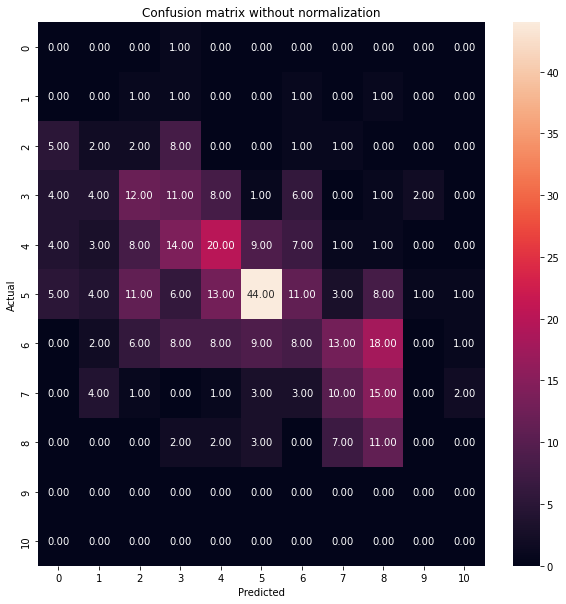

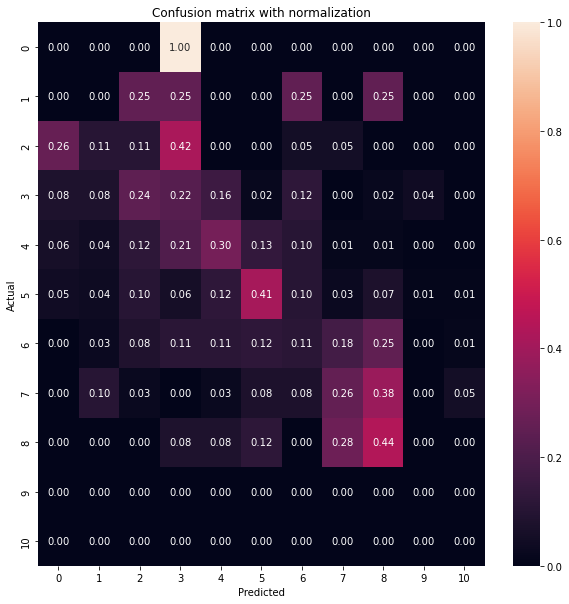

In [6]:
#plot result

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



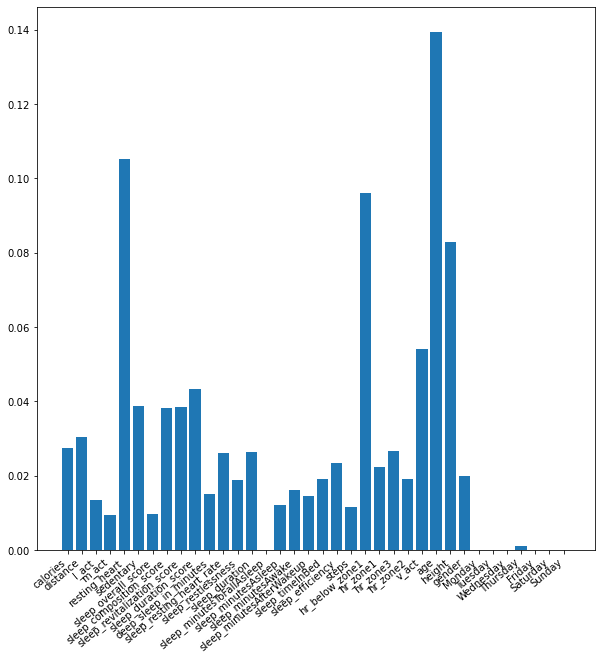

In [7]:
#feature importance
importance = model.feature_importances_

fig = plt.figure(figsize=(10,10))
plt.bar(X_test.columns, importance)
plt.xticks(rotation=40, ha = 'right')
plt.show()

In [8]:
print('training data')
print(classification_report(y_train, model.predict(X_train)))

print('test data')
print(classification_report(y_test, model.predict(X_test)))

training data
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       351
         1.0       0.82      1.00      0.90       351
         2.0       0.68      0.82      0.74       351
         3.0       0.65      0.64      0.65       351
         4.0       0.57      0.46      0.50       351
         5.0       0.70      0.43      0.53       351
         6.0       0.60      0.54      0.57       351
         7.0       0.69      0.58      0.63       351
         8.0       0.68      0.85      0.76       351
         9.0       0.94      1.00      0.97       351
        10.0       0.97      1.00      0.98       351

    accuracy                           0.76      3861
   macro avg       0.75      0.76      0.74      3861
weighted avg       0.75      0.76      0.74      3861

test data
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         4
